In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt

In [124]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg16 import VGG16

In [182]:
"""data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)"""


data_gen = ImageDataGenerator(
    rescale = 1./255,dtype=float
)

In [183]:
training_data=data_gen.flow_from_directory("/kaggle/input/microsoft-catsvsdogs-dataset/PetImages",
                                          target_size=(224,224),batch_size=64,
                                          class_mode="binary",save_format='jpg')

Found 25000 images belonging to 2 classes.


In [170]:
print(len(training_data.labels))
print(len(training_data))

25000
391


In [171]:
vgg16 = VGG16(input_shape =[224,224,3],
              weights = "imagenet",
              include_top = False)

In [172]:
vgg16.trainable=False

In [173]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [174]:
# Adding our custom dense layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras import layers 
from tensorflow import keras
# Adding our custom dense layers

model = keras.Sequential([
    vgg16,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [175]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [176]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',patience=20,mode='auto',baseline=None,restore_best_weights=True
                       ,start_from_epoch=10)

In [177]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

import os 
from PIL import Image
path="/kaggle/input/microsoft-catsvsdogs-dataset/PetImages"
categories = ["Cat", "Dog"]
img_data = []
label_data = []
for i in categories:
    new_path=os.path.join(path,i)
    label = categories.index(i)
    for filename in os.listdir(new_path):
        if filename.endswith('.jpg'):
            try:
                img = Image.open(new_path+filename) # open the image file
                img.verify()# verify that it is, in fact an image
                img_array = np.array(img)
                img_data.append(img_array)
                label_data.append(label)
            except (IOError) as e:
                print('Bad file:', filename)


In [202]:
import cv2
main_folder = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/"
categories = ["Cat", "Dog"]
IMG_SIZE = 224
img_data = []
label_data = []
def load_images_in_directory():
    for categ in categories:
        folder = os.path.join(main_folder, categ)
        label = categories.index(categ)
        for img in os.listdir(folder):
            img_path = os.path.join(folder, img)

            try:
                img = cv2.imread(img_path)
                img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img_array = np.array(img_resized)
                #img_array = img_array/255.0
                img_data.append(img_array)
                label_data.append(label)
            except Exception as e:
                continue

In [203]:
load_images_in_directory()

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


In [204]:
len(img_data) #24946

24946

In [215]:
list(zip(img_data[0:1],label_data[0:1]))[0]

(array([[[119, 105,  99],
         [126, 126, 118],
         [128, 138, 130],
         ...,
         [ 37,  32,  29],
         [118, 112, 107],
         [ 26,  20,  15]],
 
        [[ 45,  22,  17],
         [ 35,  25,  18],
         [ 29,  29,  24],
         ...,
         [ 51,  46,  43],
         [104,  98,  93],
         [ 33,  27,  20]],
 
        [[120,  87,  84],
         [118,  97,  92],
         [128, 116, 112],
         ...,
         [ 68,  64,  61],
         [ 86,  80,  73],
         [ 37,  32,  23]],
 
        ...,
 
        [[197, 206, 220],
         [212, 220, 234],
         [215, 223, 236],
         ...,
         [ 50,  46,  42],
         [159, 149, 149],
         [ 94,  80,  84]],
 
        [[189, 196, 211],
         [195, 201, 216],
         [217, 223, 236],
         ...,
         [ 79,  76,  72],
         [148, 139, 140],
         [ 77,  63,  69]],
 
        [[195, 196, 209],
         [205, 205, 219],
         [206, 206, 220],
         ...,
         [113, 115, 113],
  

In [216]:
combined_data = list(zip(img_data, label_data))
print(combined_data[5])
import random
random.shuffle(combined_data)
print(combined_data[5])

(array([[[ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28],
        ...,
        [ 72,  80,  78],
        [ 70,  78,  77],
        [ 69,  77,  76]],

       [[ 28,  28,  28],
        [ 27,  27,  27],
        [ 26,  26,  26],
        ...,
        [ 68,  76,  75],
        [ 69,  77,  76],
        [ 69,  77,  76]],

       [[ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27],
        ...,
        [ 68,  76,  75],
        [ 66,  74,  73],
        [ 68,  77,  76]],

       ...,

       [[154, 163, 172],
        [153, 159, 170],
        [155, 159, 169],
        ...,
        [ 76, 103, 140],
        [129, 138, 156],
        [152, 158, 171]],

       [[153, 160, 169],
        [147, 153, 164],
        [150, 154, 165],
        ...,
        [ 77, 102, 136],
        [131, 138, 156],
        [152, 155, 169]],

       [[145, 152, 161],
        [140, 147, 156],
        [139, 145, 156],
        ...,
        [ 77, 100, 132],
        [134, 141, 159],
        [150, 156, 169]

In [218]:
X, y = zip(*combined_data)
print(X[5],y[5])

[[[ 81 100  69]
  [ 82 103  71]
  [ 85 107  75]
  ...
  [100 115  84]
  [100 114  87]
  [101 114  88]]

 [[ 87 105  74]
  [ 85 103  72]
  [ 84 105  72]
  ...
  [111 126  95]
  [109 124  93]
  [107 122  93]]

 [[ 88 104  73]
  [ 95 112  80]
  [ 91 110  77]
  ...
  [102 117  86]
  [102 117  85]
  [103 118  86]]

 ...

 [[ 58  62  91]
  [ 56  53  72]
  [ 61  51  63]
  ...
  [ 60  91  52]
  [ 65  96  53]
  [ 65  95  52]]

 [[ 57  62  90]
  [ 56  53  72]
  [ 62  52  65]
  ...
  [ 64  92  56]
  [ 65  90  52]
  [ 66  92  53]]

 [[ 55  60  88]
  [ 54  50  70]
  [ 59  49  62]
  ...
  [ 66  90  55]
  [ 63  83  49]
  [ 67  86  52]]] 0


In [220]:
X = np.array(X) 
y = np.array(y)

In [221]:
print(X.shape, y.shape)

(24946, 224, 224, 3) (24946,)


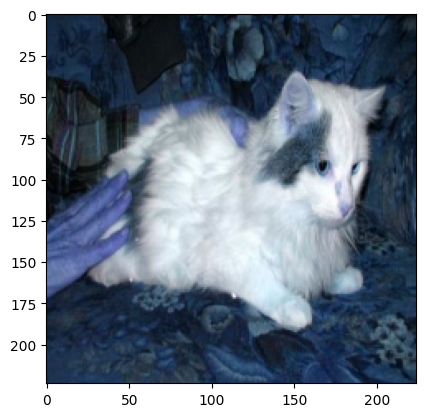

In [222]:
plt.imshow(X[0])

In [223]:
model.fit(x=X,y=y,validation_split=0.2,epochs=10)

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 143s 227ms/step - accuracy: 0.9014 - loss: 0.6300 - val_accuracy: 0.9279 - val_loss: 0.1703
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 93s 149ms/step - accuracy: 0.9406 - loss: 0.1727 - val_accuracy: 0.9429 - val_loss: 0.1683
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 94s 150ms/step - accuracy: 0.9536 - loss: 0.1376 - val_accuracy: 0.9561 - val_loss: 0.1438
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 94s 151ms/step - accuracy: 0.9640 - loss: 0.1064 - val_accuracy: 0.9675 - val_loss: 0.1334
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 94s 150ms/step - accuracy: 0.9785 - loss: 0.0784 - val_accuracy: 0.9758 - val_loss: 0.0951
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 94s 150ms/step - accuracy: 0.9881 - loss: 0.0619 - val_accuracy: 0.9768 - val_loss: 0.0828
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 93s 150ms/step - accuracy: 0.9925 - loss: 0.0335 - val_accuracy: 0.9745 - val_loss: 0.0903
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 93s 150ms/step - accuracy: 0.9936 - loss: 

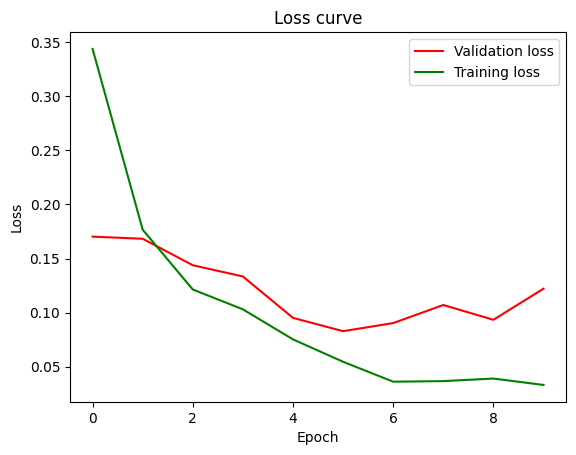

In [224]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['val_loss'],c="red",label='Validation loss')
plt.plot(model.history.history['loss'],c="green",label='Training loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.legend()



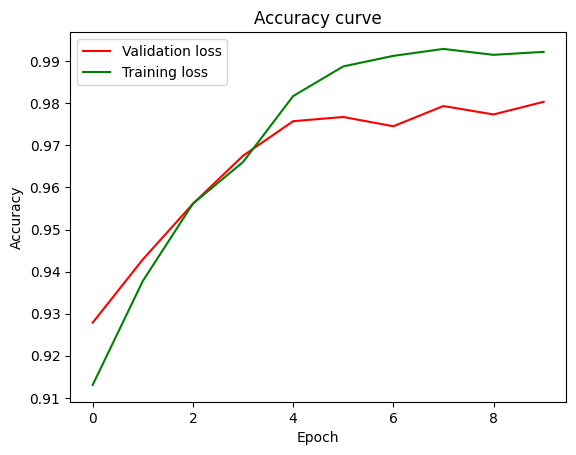

In [226]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['val_accuracy'],c="red",label='Validation loss')
plt.plot(model.history.history['accuracy'],c="green",label='Training loss')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.legend()

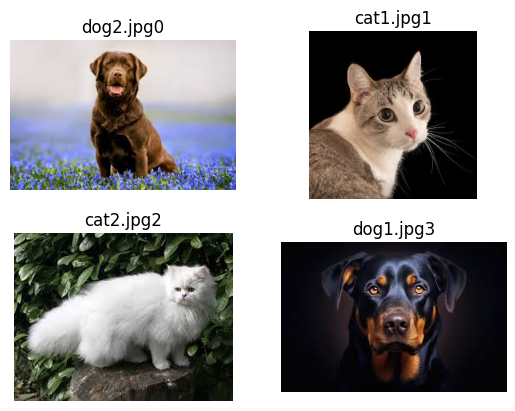

In [265]:
from tensorflow.keras.preprocessing import image
images_path="/kaggle/input/catdog/imgs"
image_arr=[]
plt.subplots(2,2)
for i,image_file in enumerate(os.listdir(images_path)):
    imagefile=os.path.join(images_path,image_file)
    img = image.load_img(imagefile, target_size=(224,224))
    x=image.img_to_array(img)
    image_arr.append(x)
    plt.subplot(2, 2, i+1)
    Z = plt.imread(imagefile)
    plt.imshow(Z)
    plt.title(image_file+str(i))
    plt.axis('off')

In [293]:
from tensorflow.keras.preprocessing import image
images_path="/kaggle/input/catdog/imgs"
image_arr2=[]
for i,image_file in enumerate(os.listdir(images_path)):
    img_path=os.path.join(images_path,image_file)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_array = np.array(img_resized)
    #img_array = img_array/255.0
    image_arr2.append(img_array)

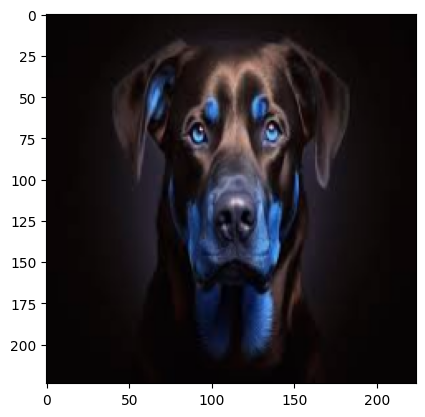

In [319]:
plt.imshow(image_arr2[3])

In [320]:
from keras.applications.vgg16 import preprocess_input

In [321]:
x=image_arr2[1]

In [322]:
x=x*1.0/225

In [323]:
import numpy as np
print(x.shape)
x=np.expand_dims(x,axis=0)
print(x.shape)
img_data=preprocess_input(x)
print(img_data.shape)

(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [324]:
x.shape

(1, 224, 224, 3)

In [325]:
y_pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [326]:
y_pred = np.argmax(y_pred, axis = 1)

In [327]:
#0 means Cats and 1 meanse dog
y_pred

array([0])